## [데이터분석 간단히 보기]

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [Part1] 데이터준비

In [17]:
#파일불러오기
df=pd.read_csv('./data/연습문제13-03.csv')

In [18]:
#데이터 살펴보기
df.head()

,school,school_setting,school_type,teaching_method,n_student,student_id,gender,lunch,cs_score
0,ANKYI,Urban,Non-public,Standard,20,2FHT3,Female,Does not qualify,72
1,ANKYI,Urban,Non-public,Standard,20,3JIVH,Female,Does not qualify,79
2,ANKYI,Urban,Non-public,Standard,20,3XOWE,Male,Does not qualify,76
3,ANKYI,Urban,Non-public,Standard,20,556O0,Female,Does not qualify,77
4,ANKYI,Urban,Non-public,Standard,20,74LOE,Male,Does not qualify,76


In [19]:
#결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           2133 non-null   object
 1   school_setting   2133 non-null   object
 2   school_type      2133 non-null   object
 3   teaching_method  2133 non-null   object
 4   n_student        2133 non-null   int64 
 5   student_id       2133 non-null   object
 6   gender           2133 non-null   object
 7   lunch            2133 non-null   object
 8   cs_score         2133 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 150.1+ KB


In [26]:
df[df['cs_score']==100]

,school,school_setting,school_type,teaching_method,n_student,student_id,gender,lunch,cs_score
902,IDGFP,Urban,Non-public,Experimental,17,BYVSP,Male,Does not qualify,100
903,IDGFP,Urban,Non-public,Experimental,17,D9SR6,Female,Does not qualify,100
905,IDGFP,Urban,Non-public,Experimental,17,K5955,Male,Does not qualify,100
907,IDGFP,Urban,Non-public,Experimental,17,P32P9,Male,Does not qualify,100
908,IDGFP,Urban,Non-public,Experimental,17,QXTHU,Male,Does not qualify,100
909,IDGFP,Urban,Non-public,Experimental,17,RG9R4,Male,Does not qualify,100
911,IDGFP,Urban,Non-public,Experimental,17,SH2DM,Male,Does not qualify,100
915,IDGFP,Urban,Non-public,Experimental,17,W4KYQ,Female,Does not qualify,100


## [Part2] 데이터기초통계
    - 아래의 hist 를 통해서 분석가능한 내용
        - 일반적으로, 히스토그램에서 막대가 넓은 범위에 걸쳐 있으면 분산이 크다고 볼 수 있으며 
        - 막대가 좁은 범위에 집중되어 있으면 분산이 작다고 볼 수 있음
        - 'n_student' 히스토그램은 막대들이 비교적 좁은 범위에 집중되어 있는 반면, 
        - 'cs_score' 히스토그램은 좀 더 넓은 범위에 막대들이 퍼져 있는 것으로 보임즉, 
        - 'n_student' 히스토그램은 학생 수가 비교적 일정한 범위 내에서 변동하는 것을 보여주고, 
        - 'cs_score' 히스토그램은 점수의 변동 폭이 더 크다는 것을 나타낸다.
        - 또한, 'n_student' 히스토그램의 막대는 중앙 부근에 더 높은 빈도수를 보여주는 반면, 
        - 'cs_score' 히스토그램은 좀 더 균등하게 분포되어 있는 것처럼 보인다.

array([[<Axes: title={'center': 'n_student'}>,
        <Axes: title={'center': 'cs_score'}>]], dtype=object)

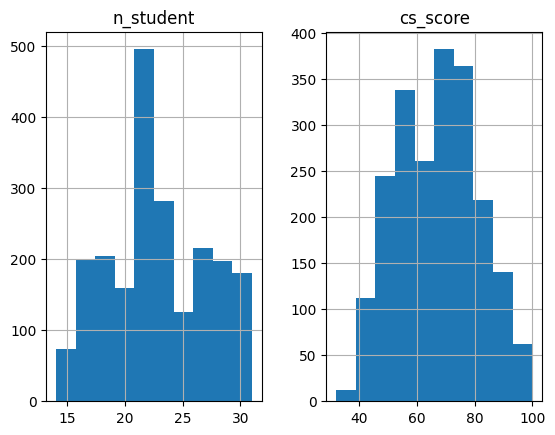

In [24]:
# 숫자변수만 보기
df.hist()

In [27]:
## 기초통계로 확인가능
df.describe()   # cs_score' 히스토그램은 점수의 변동 폭이 더 크다는 것을 나타낸다. (std 표준편차값이 더 큼을 알수 있다)

,n_student,cs_score
count,2133.000000,2133.000000
mean,22.796531,67.102203
std,4.228893,13.986789
min,14.000000,32.000000
25%,20.000000,56.000000
50%,22.000000,68.000000
75%,27.000000,77.000000
max,31.000000,100.000000


In [28]:
## 편리하게 확인하기 위하여 / 가로 세로의 위치를 변경하고
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
cs_score,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


In [43]:
## 편차값만 출력해서 볼수 있음
## 인덱스loc 도 가능, tmp=df.describe();tmp.loc['std']  
df.describe().T['std']  

n_student     4.228893
cs_score     13.986789
Name: std, dtype: float64

## [Part3] 학교 위치에 따른 분석
- Urban: 주로 도시 지역이나 도시적 특성이 있는 지역
- Suburban: 도시 외곽지역
- Rural: 시골지역이나 농촌지역

In [46]:
df['school_setting'].value_counts()

school_setting
Urban       906
Suburban    717
Rural       510
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='school_setting'>

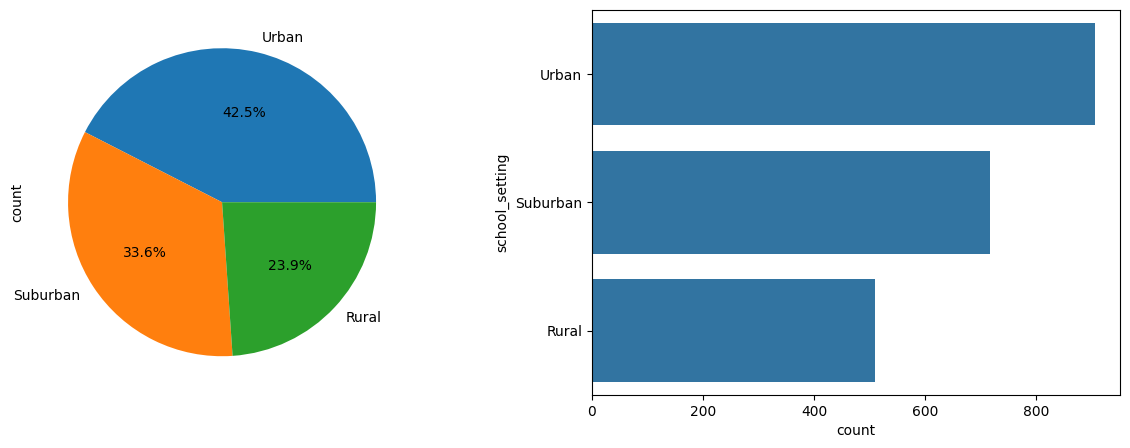

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['school_setting'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(df['school_setting'])

<Axes: xlabel='cs_score', ylabel='count'>

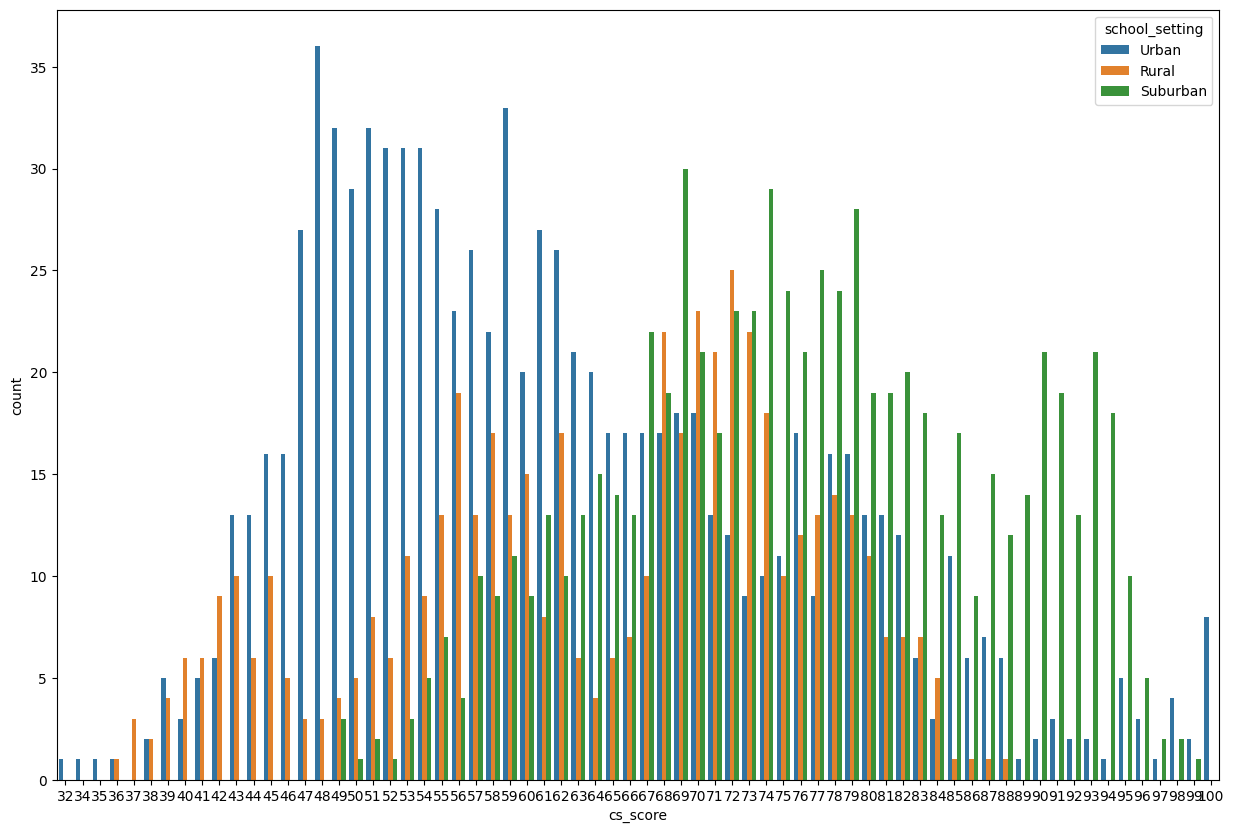

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x='cs_score', hue='school_setting',data=df)
# suburban 지역 학교가 성적이 높음

<Axes: xlabel='cs_score', ylabel='school_setting'>

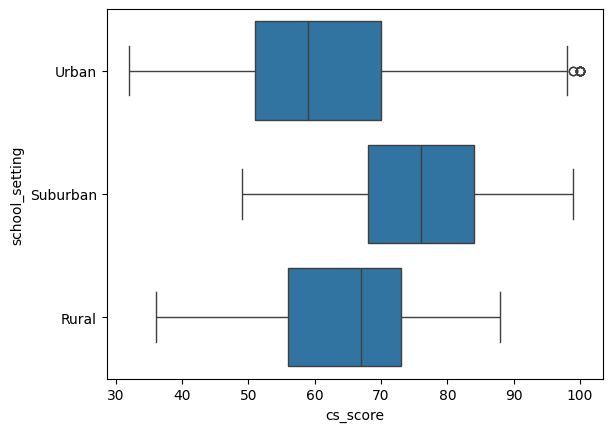

In [49]:
# suburban 지역 학교의 평균 성적이 높음
sns.boxplot(x='cs_score',y='school_setting',data=df)

## [Part4] 학교 유형에 따른 분석

In [50]:
df['school_type'].value_counts()

school_type
Public        1582
Non-public     551
Name: count, dtype: int64

In [51]:
df['school_type'].isnull().sum()  #결측치확인

0

<Axes: xlabel='count', ylabel='school_type'>

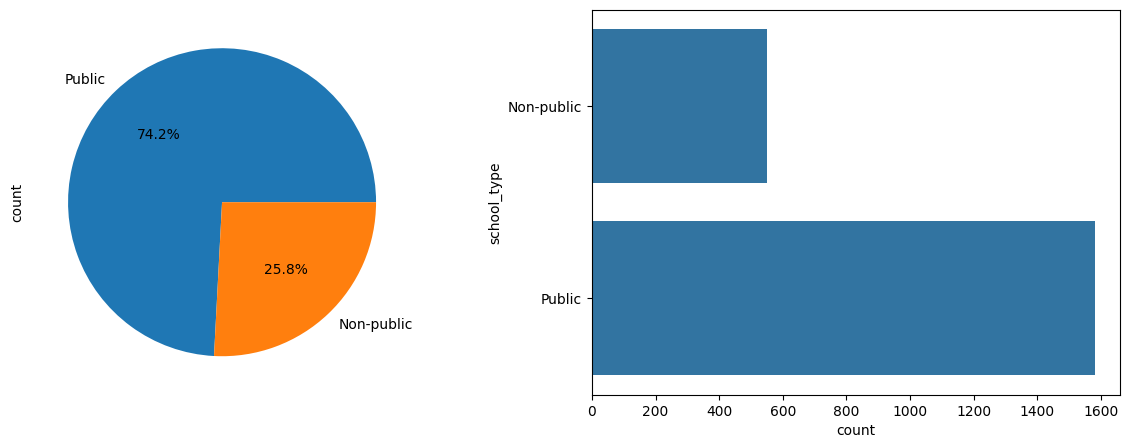

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['school_type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(df['school_type'])

<Axes: xlabel='cs_score', ylabel='count'>

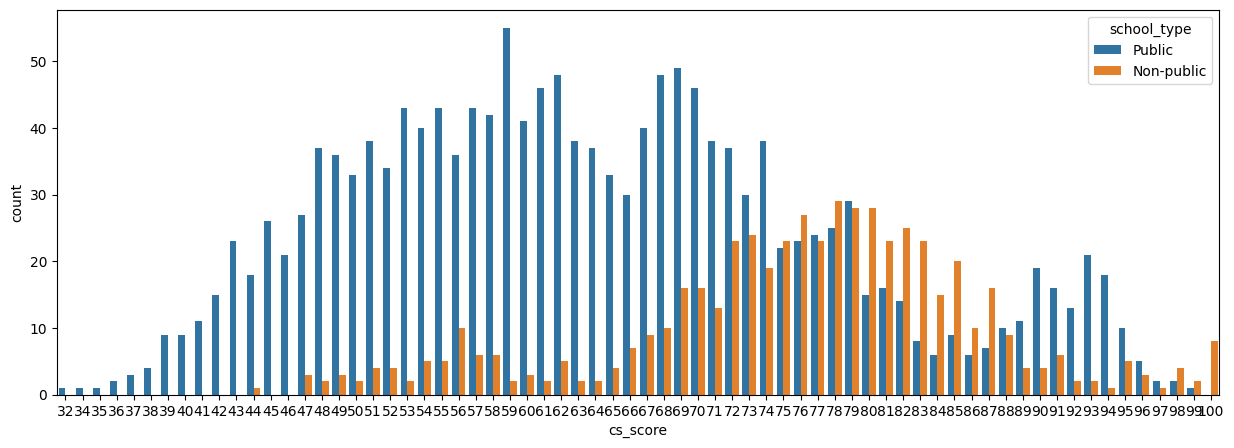

In [54]:
# 공립학교에서 하위권 성적에 많이 분포됨.

plt.figure(figsize=(15,5))
sns.countplot(x='cs_score', hue='school_type',data=df)


<Axes: xlabel='cs_score', ylabel='school_type'>

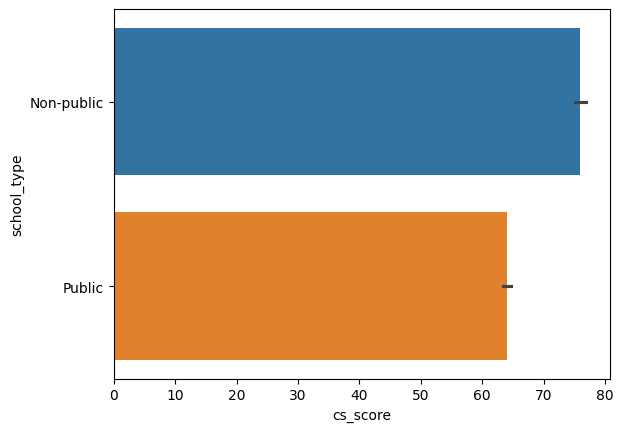

In [57]:
sns.barplot(x='cs_score',y='school_type',data=df, hue='school_type')

<Axes: xlabel='cs_score', ylabel='school_type'>

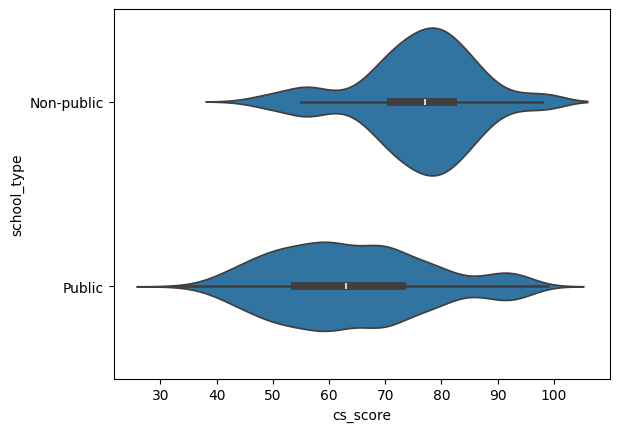

In [59]:
# 사립학교 학생들의 성적이 높다.
sns.violinplot(x='cs_score',y='school_type',data=df)


## [Part5] teaching_method에 따른 분석
- Standard : 일반적인 교육방법
- Experimental: 실험적인 교육방법

In [60]:
df['teaching_method'].value_counts()

teaching_method
Standard        1373
Experimental     760
Name: count, dtype: int64

In [61]:
df['teaching_method'].isnull().sum()

0

<Axes: xlabel='count', ylabel='teaching_method'>

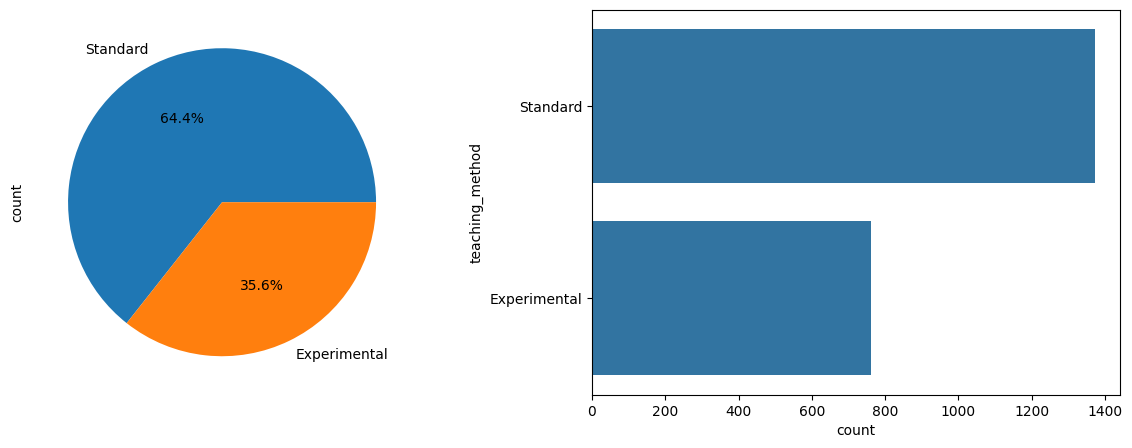

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['teaching_method'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(df['teaching_method'])

<Axes: xlabel='cs_score', ylabel='count'>

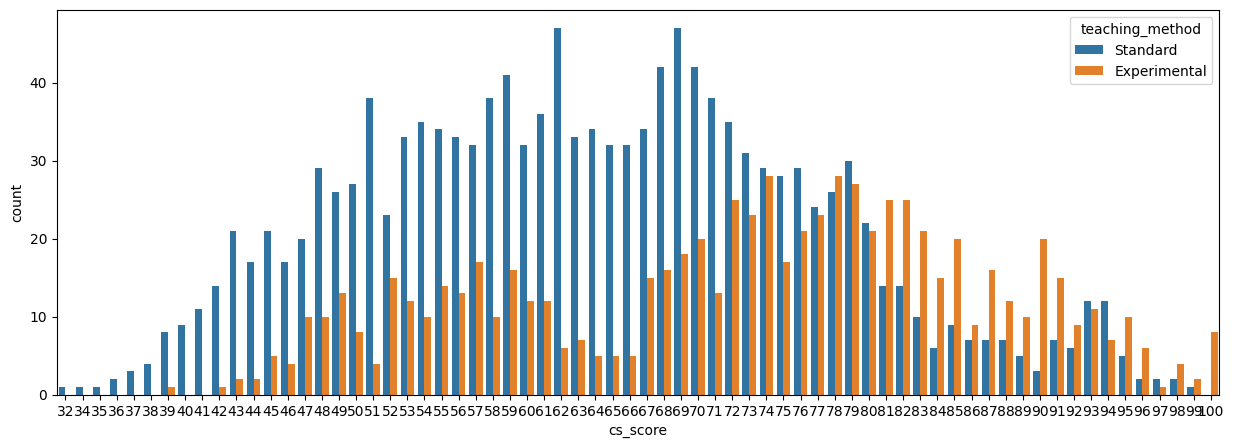

In [64]:
# 실험적인 교육법이 성적이 높음.
plt.figure(figsize=(15,5))
sns.countplot(x='cs_score', hue='teaching_method',data=df)

<Axes: xlabel='cs_score', ylabel='teaching_method'>

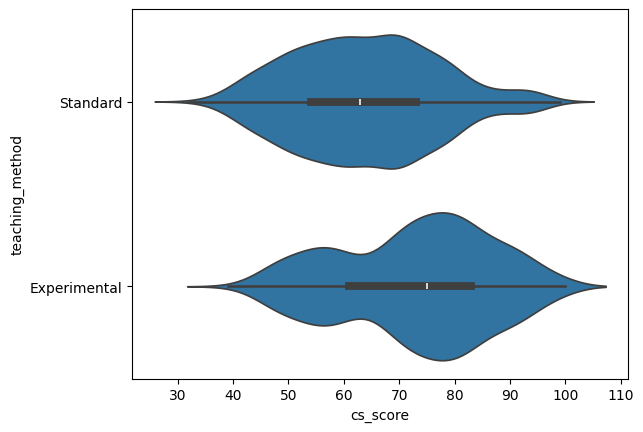

In [66]:
# experimental한 교육법이 성적이 높다.
sns.violinplot(x='cs_score',y='teaching_method',data=df)


## [Part6] 교실 학생수에 따른 분석

In [67]:
df['n_student'].unique()

array([20, 21, 18, 15, 16, 19, 17, 28, 27, 24, 14, 22, 23, 31, 25, 26, 29,
       30], dtype=int64)

n_student
22    264
21    231
27    189
28    168
20    160
30    150
24    144
23    138
17    136
19    133
25    125
18     72
16     64
15     45
31     31
29     29
14     28
26     26
Name: count, dtype: int64

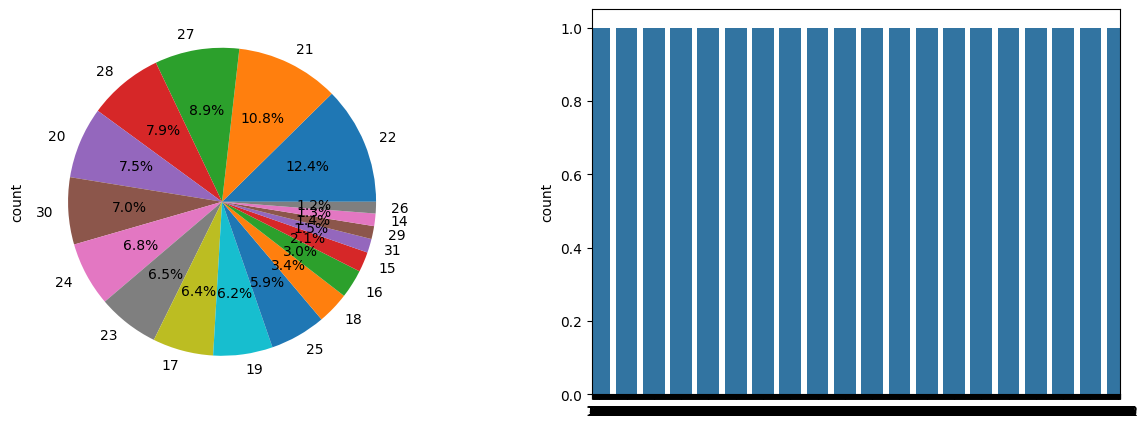

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['n_student'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['n_student'])

df['n_student'].value_counts()

<Axes: xlabel='n_student', ylabel='cs_score'>

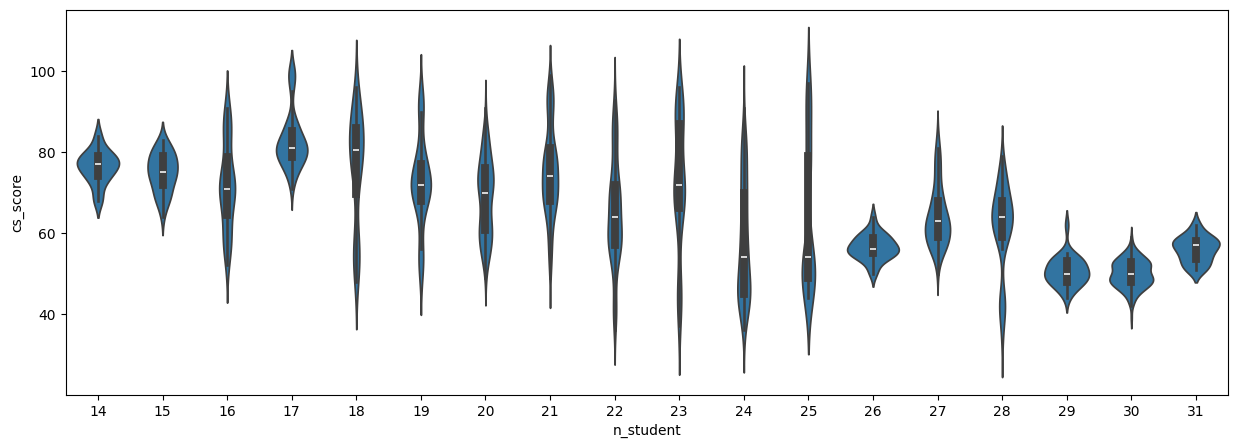

In [70]:
plt.figure(figsize=(15,5))
sns.violinplot(x='n_student',y='cs_score',data=df)

<Axes: xlabel='n_student', ylabel='cs_score'>

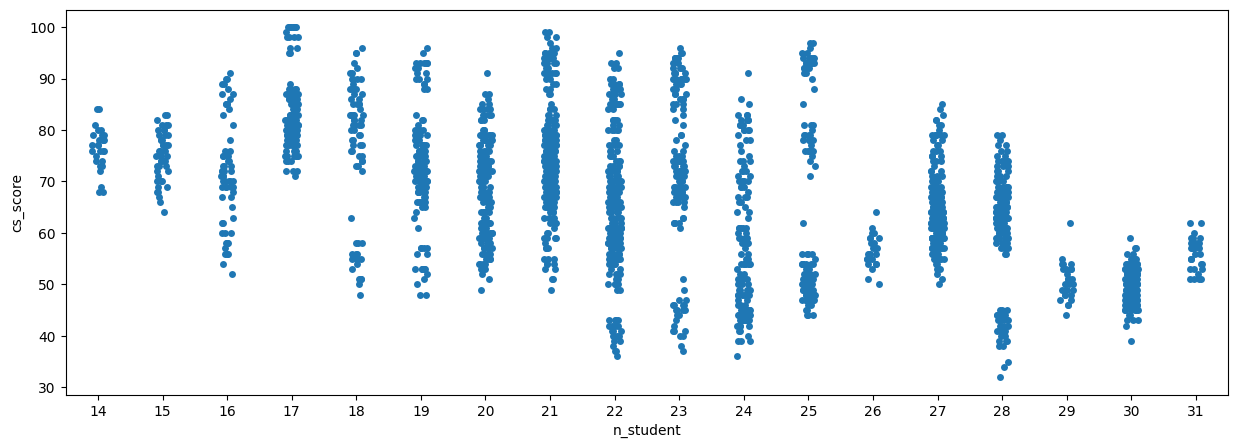

In [72]:
# 한 교실에 학생 수가 많으면 성적이 낮음
plt.figure(figsize=(15,5))
sns.stripplot(x='n_student',y='cs_score',data=df)



## [Part7] 성별에 따른 분석

gender
Male      1077
Female    1056
Name: count, dtype: int64

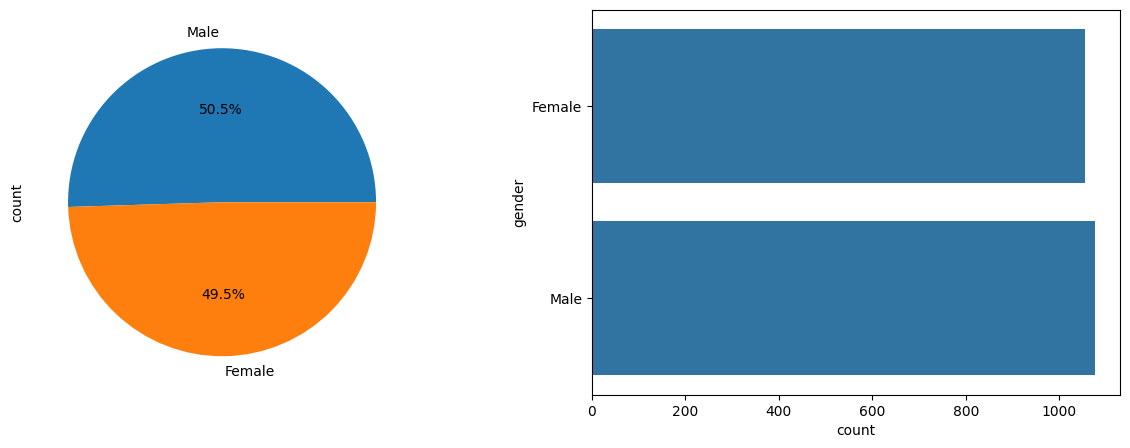

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['gender'])
df['gender'].value_counts()

<Axes: xlabel='cs_score', ylabel='count'>

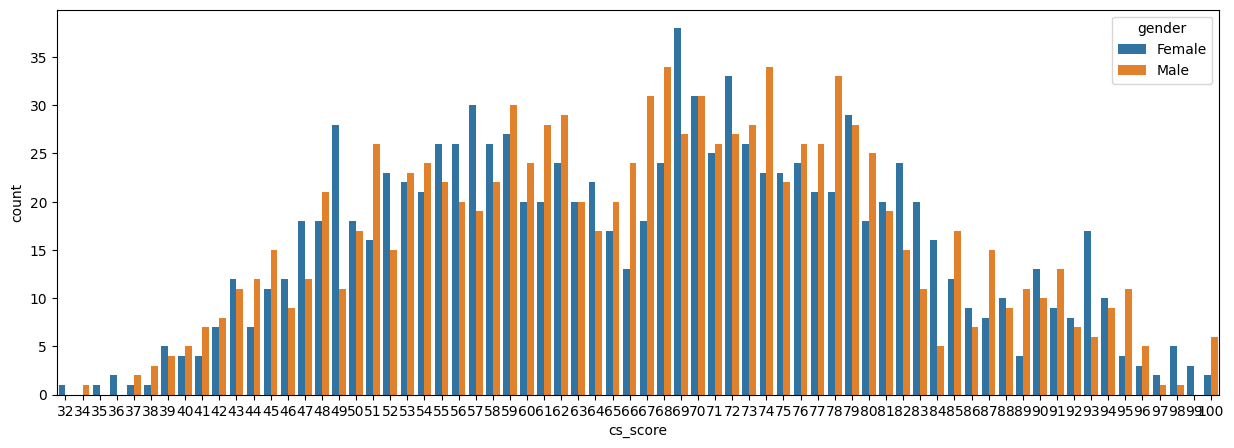

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x='cs_score', hue='gender',data=df)

<Axes: xlabel='cs_score', ylabel='gender'>

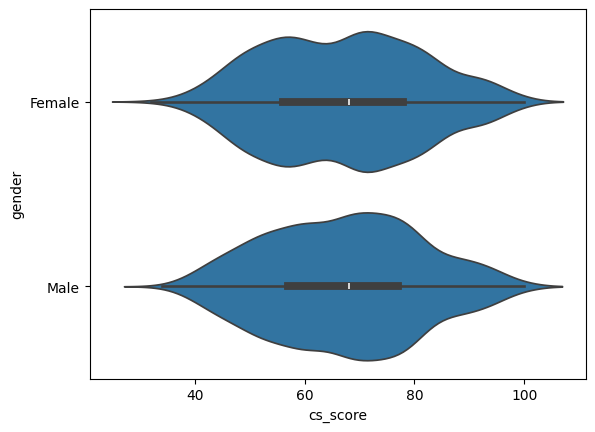

In [75]:
sns.violinplot(x='cs_score',y='gender',data=df)
# 성별에 따른 성적 차이는 나타나지 않음.

## [Part8] 점심제공에 따른 분석

lunch
Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: count, dtype: int64

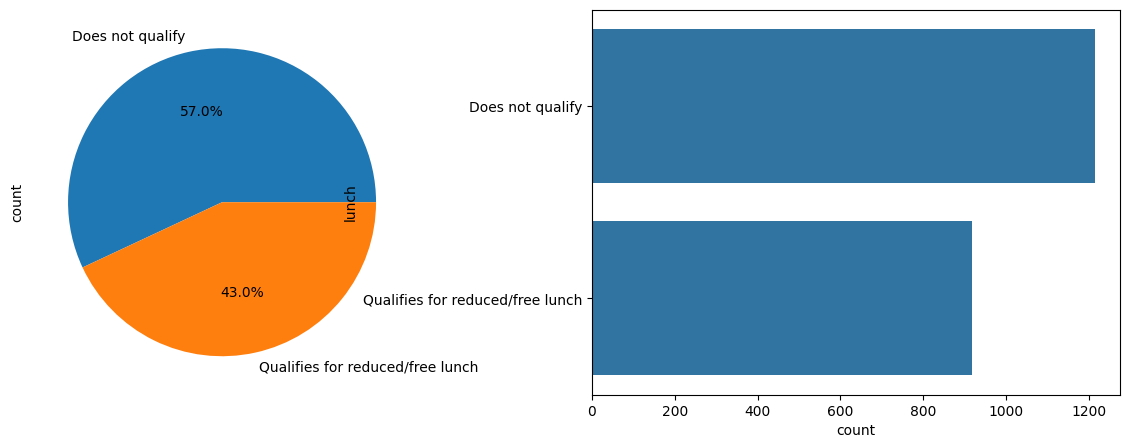

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['lunch'])
df['lunch'].value_counts()

<Axes: xlabel='cs_score', ylabel='lunch'>

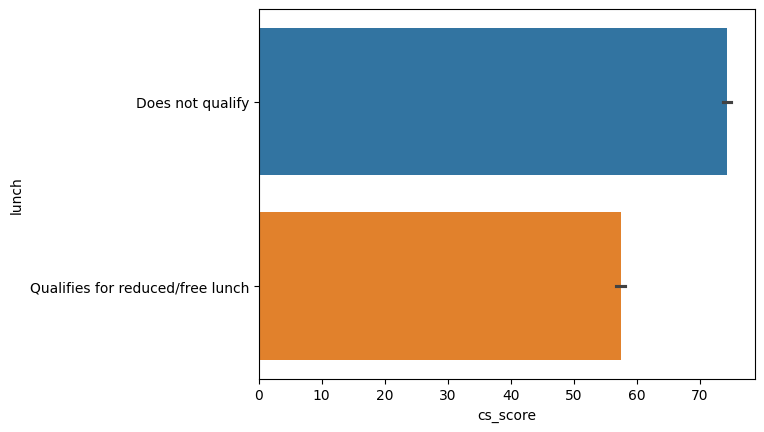

In [78]:
#점심제공 받는 학습자의 평균 성적이 낮음
sns.barplot(x='cs_score',y='lunch',data=df,hue='lunch')


## [Part9] 여러개의 데이터(다변량데이터도 분석해보자)


## [9-1] school_type와 teaching_method의 관계와 cs_score에 미치는 영향

<Figure size 1000x300 with 0 Axes>

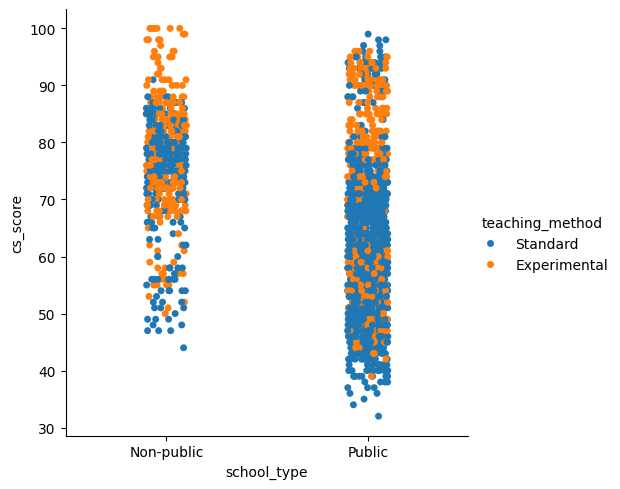

In [81]:
#사립학교가 experimental 많이 하고,
#공립 중에서 experimental 하는 곳도 몇 있음
#experimental을 적용하는 학교는 성적이 높음

plt.figure(figsize=(10,3))
sns.catplot(x='school_type',y='cs_score',hue='teaching_method',data=df) 



<Axes: xlabel='school_type', ylabel='cs_score'>

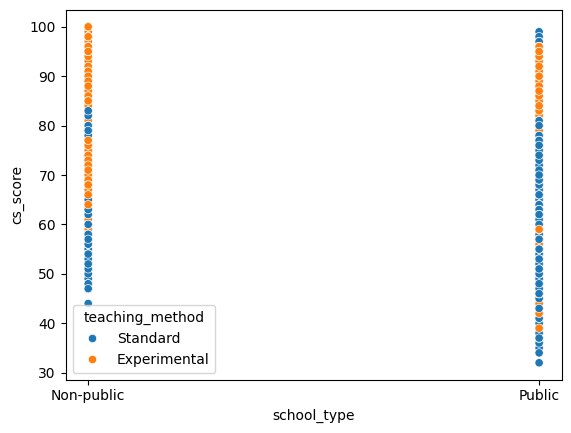

In [82]:
sns.scatterplot(x='school_type',y='cs_score',hue='teaching_method',data=df) 

## [9-2] school_type와 n_student의 관계와 cs_score에 미치는 영향

In [96]:
df['n_student'].unique()

array([20, 21, 18, 15, 16, 19, 17, 28, 27, 24, 14, 22, 23, 31, 25, 26, 29,
       30], dtype=int64)

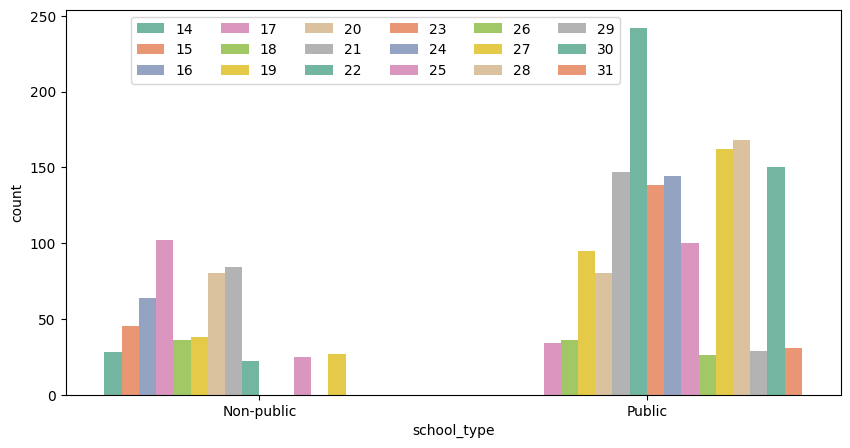

In [126]:
plt.figure(figsize=(10,5))
colors = sns.color_palette("Set2",18)
ax=sns.countplot(x='school_type',hue='n_student',data=df, palette=colors)
ax.legend(loc='upper center', bbox_to_anchor=(0.4,1), ncol=6)
plt.show()

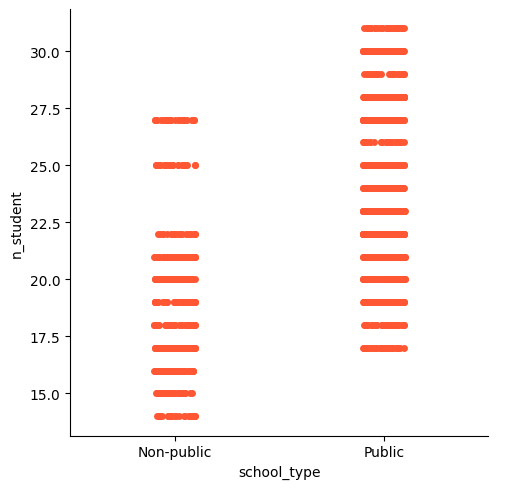

In [102]:
# 공립학교일수록 학급당 학생수 높고, 사립학교일수록 학급당 학생수 낮음
sns.catplot(x='school_type',y='n_student',data=df)



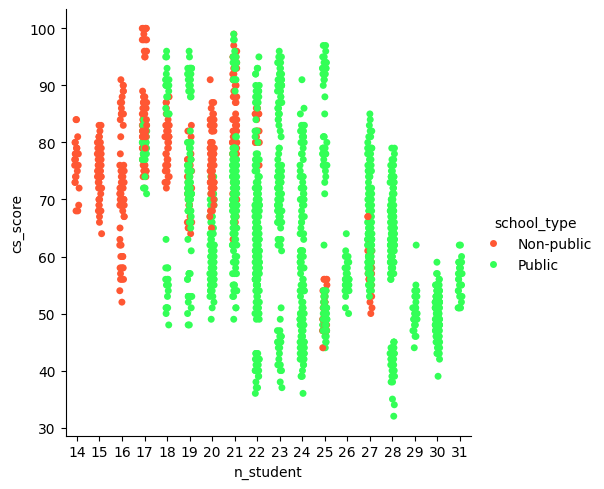

In [103]:
# 사립학교일수록 학급당 학생수 적어지고, 이럴경우 성적 높음
# 공립학교일수록 학급당 학생수 많아지고, 이럴 경우 성적이 낮음

sns.catplot(x='n_student',y='cs_score',hue='school_type',data=df)



[답안 예시]

1. <B> 시험성적이 높은 그룹의 특징은 무엇인가?
- suburban 지역일수록 성적이 높음
- non-public 학교일수록 성적이 높음
- experimental 교육법일수록 성적이 높음
- 학급 당 학생 수가 낮을수록 성적이 높음


2. <B> 중요한 특성(속성)은 무엇인가?
 - school_setting (학교 위치)
 - school_type (학교 유형)
 - teaching_method (교육 방법)
 - n_student (학급 당 학생 수)
 - lunch (점심 제공 여부)

3. <B> 위 데이터 특성을 분석항으로 알 수 있는것은 무엇인가?
- suburban 지역의 학생일수록 성적이 높은 경향이 있음
- 사립학교일수록 성적이 높은 경향이 있다. 
-실험적인 교육법을 쓸수록 성적이 높은 경향이 있고, 학급당 학생수가 낮을수록 성적이 높은 경향이 있다. 
- 점심 제공받는 학생일수록 성적이 낮은 경향이 있다.

- 사립학교일수록 실험적인 교육법을 많이 쓰며, 성적이 더 높음 
- 또한, 학교 유형과 학급당 학생수와 성적 간의 연관성을 조사해본 결과, 사립학교 일수록 학급당 학생수가 적고 성적도 더 높게 나온다는 것이 파악되었다.


4. <B> 높은 성적을 받기 위해 어떠한 아이디어를 제시할 수 있는가?

1) 실험적인 교육법을 쓸수록 성적이 높아짐 
=> 토론 수업의 확대, 정형화된 교과서 학습에서 벗어나 창의 체험 활동 및 실험 활동 확대, 플립 러닝과 같은 교육법을 실제 수업에 적용할 수 있는 교육 퐁토 조성 
2)   학급당 학생수가 낮을 수록 성적이 높아짐
=> 학급당 학생 수를 일정 수로 제한을 두는 정책을 이 필요함



5. <B> 이 외에 추가적으로 필요한 데이터가 있는가?
- 소득분위에 따른 정보가 필요함. 저소득층 학생이 성적이 낮게 나오는 경향성이 파악되면, 저소득층 아이들의 성적 향상을 위한 학습 지원 방법을 제시할 수 있을 것이다. 


